In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sns.set_style('white')

In [138]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape) # Output: (50000, 32, 32, 3) (10000, 32, 32, 3)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [139]:
n_labels = len(np.unique(y_train))
n_labels

10

array pointer = 15
x_train[15] shape: (32, 32, 3)
label: [9]


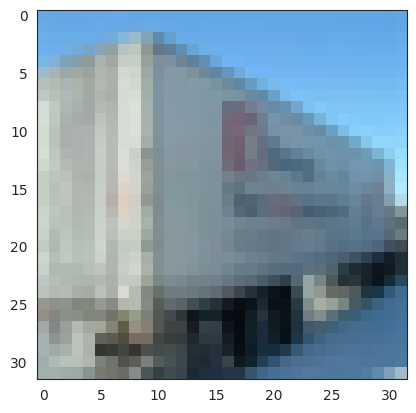

In [140]:
pointer = 15

print(F"array pointer = {pointer}")
print(F"x_train[{pointer}] shape: {X_train[pointer].shape}")
print(f"label: {y_train[pointer]}")

plt.imshow(X_train[pointer],cmap='Accent')
plt.show()

In [141]:
def check_images(dataset, dataset_name):
    """
    check images for:
    * being an array
    * shape (32x32)
    * colour channel values
    * NaN values
    """
    invalid_count = 0
    valid_count = 0

    for idx, image in enumerate(dataset):
        if not isinstance(image, np.ndarray):
            print(F"{dataset_name} - Index {idx}: Not a valid image array")
            invalid_count += 1
            continue

        if image.shape !=(32, 32, 3):
            print(f"{dataset_name} - Index {idx}: Incorrect shape {image.shape}")
            invalid_count +=1
            continue

        if not (image.dtype == np.uint8 and image.min() >= 0 and image.max() <= 255):
            print(f"{dataset_name} - Index {idx}: Invalid pixel values (Min: {image.min()}, Max: {image.max()})")
            invalid_count += 1
            continue

        if np.isnan(image).any():
            print(f"{dataset_name} - Index {idx}: Contains NaN values")
            invalid_count += 1
            continue

        valid_count += 1

    print(f"\n{dataset_name}: {valid_count} valid images, {invalid_count} invalid images")
    

In [142]:
print("Checking Images...\n")
check_images(X_train, "Train")
check_images(X_test, "Test")

Checking Images...


Train: 50000 valid images, 0 invalid images

Test: 10000 valid images, 0 invalid images


In [143]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X_train,
                                    y_train,
                                    test_size=0.2,
                                    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape)
print("* Validation set:", X_val.shape, y_val.shape)
print("* Test set:", X_test.shape, y_test.shape)

* Train set: (40000, 32, 32, 3) (40000, 1)
* Validation set: (10000, 32, 32, 3) (10000, 1)
* Test set: (10000, 32, 32, 3) (10000, 1)


In [144]:
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

In [145]:
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])

In [146]:
def count_labels(dataset, dataset_name):
    """
    Helper function to count occurrences of each label and print them
    """
    global df_freq
    unique, counts = np.unique(dataset, return_counts=True)
    for label, frequency in zip(unique, counts):
        df_freq = pd.concat([df_freq, pd.DataFrame([{'Set': dataset_name, 'Label': class_names[label], 'Frequency': frequency}])], ignore_index=True)
        print(f"* {dataset_name} - {class_names[label]}: {frequency} images")

In [147]:
count_labels(y_train, "Train")
count_labels(y_test, "Test")
count_labels(y_val, "validation")

* Train - Airplane: 3996 images
* Train - Automobile: 4014 images
* Train - Bird: 3984 images
* Train - Cat: 3970 images
* Train - Deer: 4033 images
* Train - Dog: 3984 images
* Train - Frog: 4047 images
* Train - Horse: 4001 images
* Train - Ship: 4011 images
* Train - Truck: 3960 images
* Test - Airplane: 1000 images
* Test - Automobile: 1000 images
* Test - Bird: 1000 images
* Test - Cat: 1000 images
* Test - Deer: 1000 images
* Test - Dog: 1000 images
* Test - Frog: 1000 images
* Test - Horse: 1000 images
* Test - Ship: 1000 images
* Test - Truck: 1000 images
* validation - Airplane: 1004 images
* validation - Automobile: 986 images
* validation - Bird: 1016 images
* validation - Cat: 1030 images
* validation - Deer: 967 images
* validation - Dog: 1016 images
* validation - Frog: 953 images
* validation - Horse: 999 images
* validation - Ship: 989 images
* validation - Truck: 1040 images


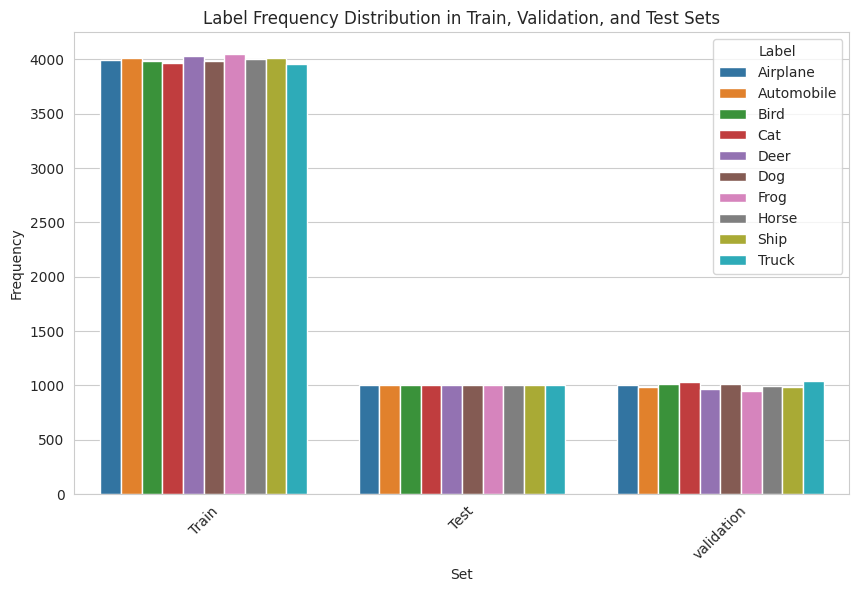

In [148]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.xticks(rotation=45)
plt.title("Label Frequency Distribution in Train, Validation, and Test Sets")
plt.savefig("/workspaces/distribution_in_sets.png", bbox_inches='tight', dpi=150)
plt.show()

In [149]:
X_train.shape

(40000, 32, 32, 3)

In [150]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], 1) 
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], X_val.shape[3], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

print(X_train.shape)

(40000, 32, 32, 3, 1)


In [151]:
X_train.max()

np.uint8(255)

In [152]:
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [153]:
X_train.max()

np.float32(1.0)

In [154]:
n_labels = 10
y_train = to_categorical(y_train, num_classes=n_labels)
y_val = to_categorical(y_val, num_classes=n_labels)
y_test = to_categorical(y_test, num_classes=n_labels)

In [155]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [159]:
def build_tf_model(input_shape, n_labels):
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=input_shape, activation='relu',))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(n_labels, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [160]:
model = build_tf_model(input_shape=X_train.shape[1:], n_labels=n_labels )
model.summary()

ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 1, 16) and input of shape (None, 32, 32, 3, 1).